In [2]:
import os
import tarfile
import re
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
path_ds = '/nobackup/users/schreurs/project_GAN/dataset'

In [18]:
ls /nobackup/users/schreurs/project_GAN/dataset

RAD25_OPER_R___TARRRE__L2__201812170755_201812180800_0001/
RAD25_OPER_R___TARRRE__L2__201812170755_201812180800_0001.tar
RAD25_OPER_R___TARRRE__L2__201812180755_201812190800_0001/
RAD25_OPER_R___TARRRE__L2__201812180755_201812190800_0001.tar
RAD25_OPER_R___TARRRE__L2__201812190755_201812200800_0001/
RAD25_OPER_R___TARRRE__L2__201812190755_201812200800_0001.tar
RAD25_OPER_R___TARRRE__L2__201812200755_201812210800_0001/
RAD25_OPER_R___TARRRE__L2__201812200755_201812210800_0001.tar
RAD25_OPER_R___TARRRE__L2__201812210755_201812220800_0001/
RAD25_OPER_R___TARRRE__L2__201812210755_201812220800_0001.tar
RAD25_OPER_R___TARRRE__L2__20181221T075500_20181222T080000_0001/
RAD25_OPER_R___TARRRE__L2__20181221T075500_20181222T080000_0001.tar
RAD25_OPER_R___TARRRE__L2__20181222T080500_20181223T080000_0001/
RAD25_OPER_R___TARRRE__L2__20181222T080500_20181223T080000_0001.tar
RAD25_OPER_R___TARRRE__L2__20181223T080500_20181224T080000_0001/
RAD25_OPER_R___TARRRE__L2__20181223T080500_20181224T080000_0001.

In [4]:
files = [f for f in os.listdir(path_ds) if os.path.isfile(os.path.join(path_ds, f))]
print("Number of days in dataset = ", len(files))

Number of days in dataset =  772


In [5]:
files[0]

'RAD25_OPER_R___TARRRE__L2__20190826T080500_20190827T080000_0001.tar'

# Unpack the tar files
The download dataset consists of 772 days each packed in a tar file. With the code below the tar files are unpacked into folders with the same name

In [5]:
# Testing path
tar_path = path_ds + '/' + files[0]
print("tar path: ", tar_path)
unpack_folder = tar_path.replace('.tar','')
print("unpack in folder: ", unpack_folder)

tar path:  /nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190826T080500_20190827T080000_0001.tar
unpack in folder:  /nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190826T080500_20190827T080000_0001


In [16]:
for file in files:
    tar_path = path_ds + '/' + file
    unpack_folder = tar_path.replace('.tar', '')
    
    tar_file = tarfile.open(tar_path)
    tar_file.extractall(unpack_folder) 
    tar_file.close()

# Open folders

Opening files in the create folders:

In [6]:
folders = [f for f in os.listdir(path_ds) if os.path.isdir(os.path.join(path_ds, f))]

In [7]:
radar_dir = path_ds + '/' + folders[0]
radar_dir

'/nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190316T080500_20190317T080000_0001'

Test on data of 1 day (folder) and 1 timestamp (file)

In [8]:
i = 5
radar_dir = path_ds  + '/' + folders[i]
print(radar_dir)
onlyfiles = [f for f in os.listdir(radar_dir) if os.path.isfile(os.path.join(radar_dir, f))]

/nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190103T080500_20190104T080000_0001


In [19]:
onlyfiles[i]

'RAD_NL25_RAC_RE_201901030930.h5'

In [9]:
h5f = h5py.File(radar_dir+'/'+onlyfiles[i], 'r')
radar_img = np.array(h5f['image1']['image_data'])
img_mask = np.array(h5f['image2']['image_data'])
print('shape image: ', radar_img.shape)
print("Uniques values in radar: ", len(np.unique(radar_img)))
print("Unique values in mask: ", len(np.unique(img_mask)))

shape image:  (765, 700)
Uniques values in radar:  34
Unique values in mask:  10297


Apparently the mask can have than two different values. So let's take a look at the images

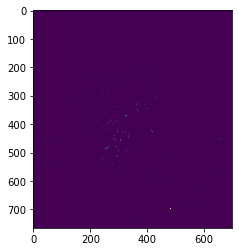

In [10]:
# Set the masked pixel to 0 so that difference between pixel values can be better seen
radar_img[radar_img==65535] = 0
plt.imshow(radar_img)
plt.show()

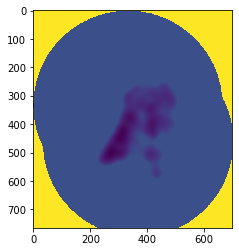

In [11]:
plt.imshow(img_mask)
plt.show()

Seems like the rough shape of the netherlands is displayed in this mask. Not sure how this image data should be interpreted.

Update: image2 displays correction fields, these are not needed for this project. image1 data is the only data that should be used in this project

# Convert data to numpy arrays

Convert h5 files to dataframe. The dataframe has three columns: timestamp, radar image data and the mask image data.

In [12]:
# Regex pattern to extract timestamp from filename
print(onlyfiles[0])
regex_p = re.compile('(\d{12})\.h5')
regex_p.findall(onlyfiles[0])[0]

RAD_NL25_RAC_RE_201901031355.h5


'201901031355'

In [39]:
folders = [f for f in os.listdir(path_ds) if os.path.isdir(os.path.join(path_ds, f))]
print(folders[2])
# Regex to extract time interval of folder
regex_p = re.compile('.+__(.+)_0001')
regex_p.findall(folders[0])[0]

RAD25_OPER_R___TARRRE__L2__20201216T080500_20201217T080000_0001


'20190316T080500_20190317T080000'

In [40]:
def load_h5(file_path):
    radar_img = None
    with h5py.File(file_path) as f:
        try:
            radar_img = np.array(f['image1']['image_data'])
        except:
            print("Error: could not read image1 data, file {}".format(file_path))
    return radar_img

In [69]:
def preprocess(in_dir, out_dir):
    '''
    Preprocess the h5 file into numpy arrays. 
    The timestamp, image1 and image2 data of each file is stored
    '''
    # Create directory if it does not exist
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    
    folders = [f for f in os.listdir(in_dir) if os.path.isdir(os.path.join(in_dir, f))]
    
    # Pattern for detecting timestamp in filename
    regex_file = re.compile('(\d{12})\.h5')
    # Pattern for detecting time interval in foldername
    regex_folder = re.compile('.+__(.+)_0001')
    
    
    for folder in tqdm(folders[:100]):
        
        radar_dir = in_dir + '/' + folder
        
        # check if regex pattern finds a timestamp
        try:
            interval = regex_folder.findall(folder)[0] 
        except:
            print('Error: could not find timestamp in folder {}'.format(folder))
            
        radar_dir_out = out_dir + '/' + interval + '/'    
        # Create directory if it does not exist
        if not os.path.exists(radar_dir_out):
            os.makedirs(radar_dir_out)        
        
        files = [f for f in os.listdir(radar_dir) if os.path.isfile(os.path.join(radar_dir, f))]
        
    
        for file in files:
            timestamp = int(regex_file.findall(file)[0])
            scan_fn = radar_dir_out + "{}.npy".format(timestamp)
            
            image1 = load_h5(radar_dir + '/' + file)
            
            radar_data = np.array([timestamp, image1])
            np.save(scan_fn, radar_data)    

In [63]:
# Create directory if it does not exist
if not os.path.exists(out_dir):
    print('gr')#os.makedirs(out_dir)

gr


In [70]:
ls /nobackup/users/schreurs/project_GAN/

dataset/     download_dataset.py            KNMI_Internship_GANs/
dataset_np/  explore_downloaded_data.ipynb


In [ ]:
in_dir = '/nobackup/users/schreurs/project_GAN/dataset'
out_dir = '/nobackup/users/schreurs/project_GAN/dataset_np'
preprocess(in_dir, out_dir)

 42%|████▏     | 42/100 [01:10<02:43,  2.81s/it]

Error: could not read image1 data, file /nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190727T080500_20190728T080000_0001/RAD_NL25_RAC_RE_201907271440.h5


 44%|████▍     | 44/100 [01:16<02:39,  2.86s/it]

Apparently there are a couple of timestamps that miss image1 data (i.e. no image_data dataset in the h5 file). 
Should look into whether these timestamps miss data or if the files got corrupted during downloading. With the code below I compare the content of h5 file of timestamp that was said to miss image_data with one that had this data

In [29]:
# https://stackoverflow.com/questions/44883175/how-to-list-all-datasets-in-h5py-file
# show all data in a hdf5 file
def descend_obj(obj,sep='\t'):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print(sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print(sep + '\t', '-',key,':',obj.attrs[key])

def h5dump(path,group='/'):
    """
    print HDF5 file metadata

    group: you can give a specific group, defaults to the root group
    """
    with h5py.File(path,'r') as f:
         descend_obj(f[group])

In [31]:
path_error= '/nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190727T080500_20190728T080000_0001/RAD_NL25_RAC_RE_201907271440.h5'
h5dump(path_error)

	 - geographic : <HDF5 group "/geographic" (1 members)>
		 - map_projection : <HDF5 group "/geographic/map_projection" (0 members)>
	 - image1 : <HDF5 group "/image1" (2 members)>
		 - calibration : <HDF5 group "/image1/calibration" (0 members)>
		 - statistics : <HDF5 group "/image1/statistics" (0 members)>
	 - image2 : <HDF5 group "/image2" (3 members)>
		 - calibration : <HDF5 group "/image2/calibration" (0 members)>
		 - image_data : <HDF5 dataset "image_data": shape (765, 700), type "<u2">
		 - statistics : <HDF5 group "/image2/statistics" (0 members)>
	 - overview : <HDF5 group "/overview" (0 members)>
	 - radar1 : <HDF5 group "/radar1" (0 members)>
	 - radar2 : <HDF5 group "/radar2" (0 members)>
	 - radar3 : <HDF5 group "/radar3" (0 members)>
	 - radar4 : <HDF5 group "/radar4" (0 members)>
	 - radar5 : <HDF5 group "/radar5" (0 members)>
	 - radar6 : <HDF5 group "/radar6" (0 members)>


In [32]:
path_no_error= '/nobackup/users/schreurs/project_GAN/dataset/RAD25_OPER_R___TARRRE__L2__20190727T080500_20190728T080000_0001/RAD_NL25_RAC_RE_201907271540.h5'
h5dump(path_no_error)

	 - geographic : <HDF5 group "/geographic" (1 members)>
		 - map_projection : <HDF5 group "/geographic/map_projection" (0 members)>
	 - image1 : <HDF5 group "/image1" (3 members)>
		 - calibration : <HDF5 group "/image1/calibration" (0 members)>
		 - image_data : <HDF5 dataset "image_data": shape (765, 700), type "<u2">
		 - statistics : <HDF5 group "/image1/statistics" (0 members)>
	 - image2 : <HDF5 group "/image2" (3 members)>
		 - calibration : <HDF5 group "/image2/calibration" (0 members)>
		 - image_data : <HDF5 dataset "image_data": shape (765, 700), type "<u2">
		 - statistics : <HDF5 group "/image2/statistics" (0 members)>
	 - overview : <HDF5 group "/overview" (0 members)>
	 - radar1 : <HDF5 group "/radar1" (0 members)>
	 - radar2 : <HDF5 group "/radar2" (0 members)>
	 - radar3 : <HDF5 group "/radar3" (0 members)>
	 - radar4 : <HDF5 group "/radar4" (0 members)>
	 - radar5 : <HDF5 group "/radar5" (0 members)>
	 - radar6 : <HDF5 group "/radar6" (0 members)>
